✅ Data loaded for visualization


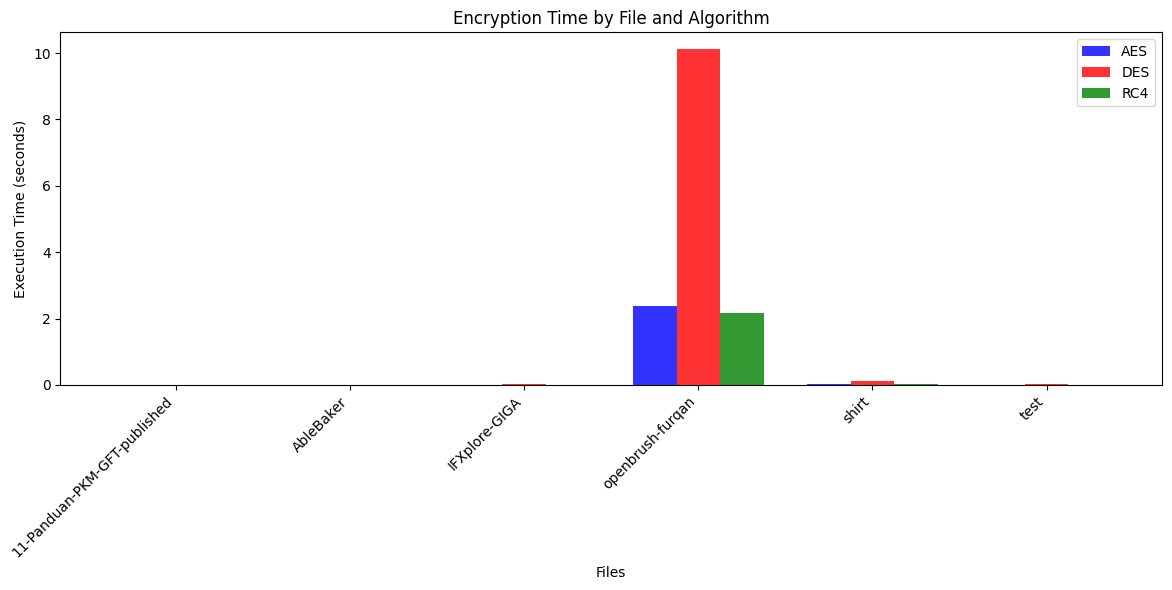

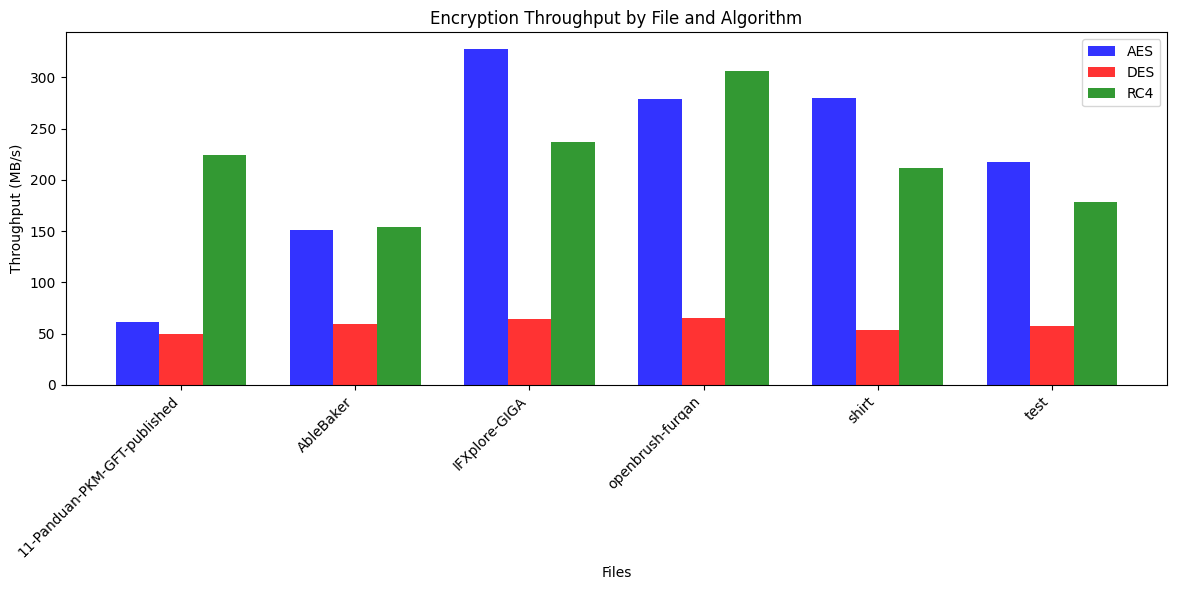

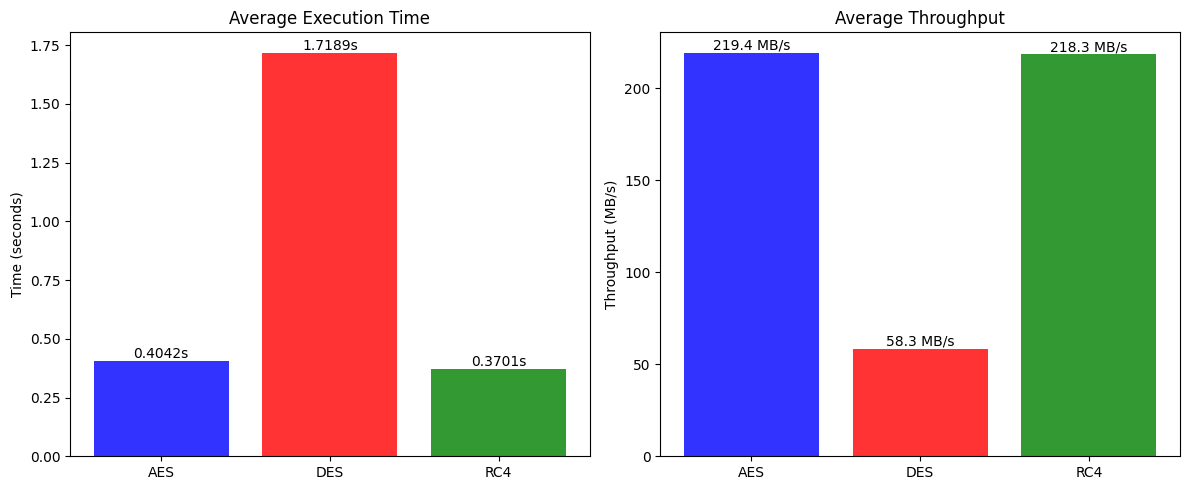

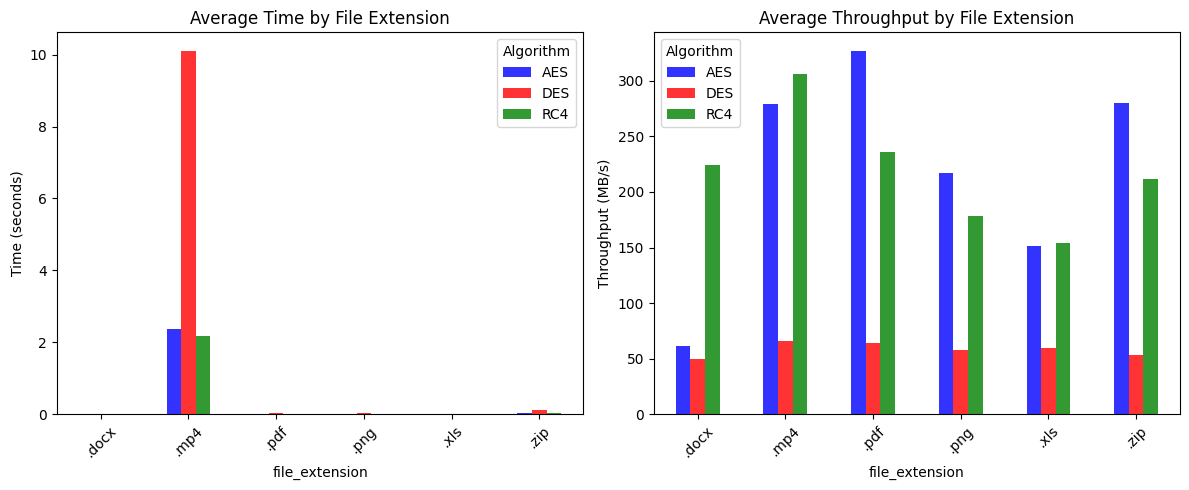

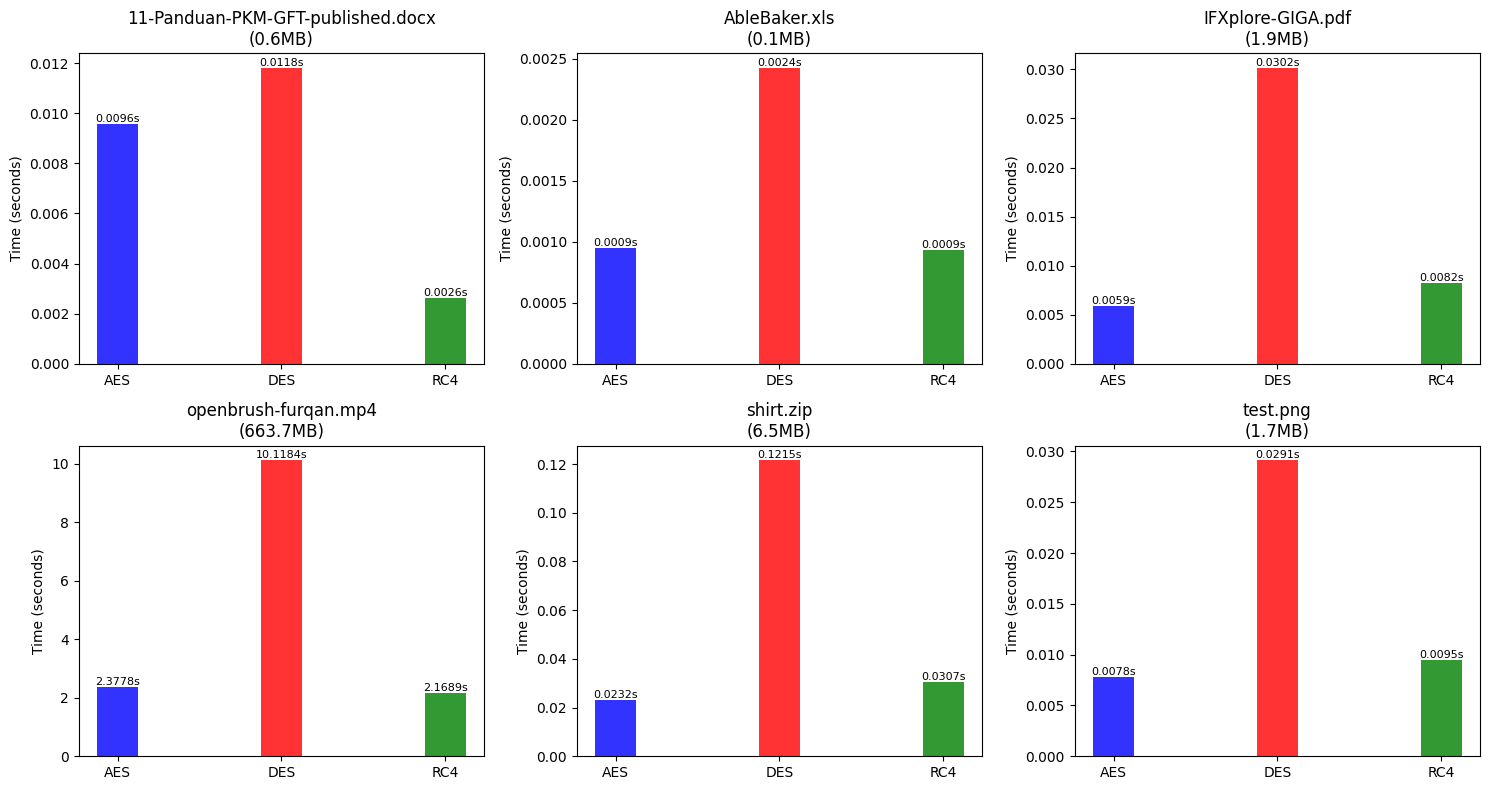

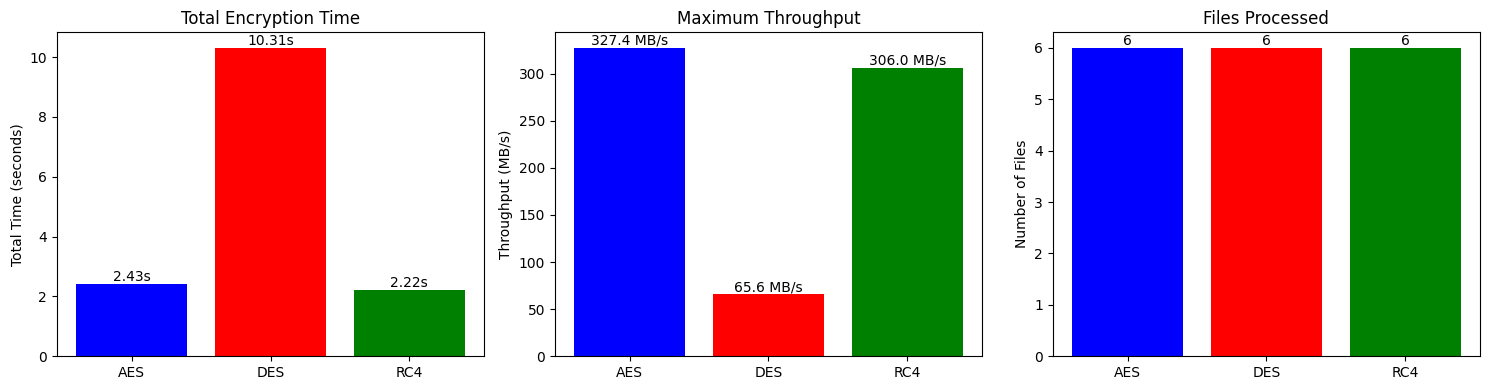

✅ All simple bar chart visualizations completed!


In [20]:
# %% [markdown]
# # Encryption Performance Visualizations
# Simple bar chart comparisons

# %%
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Set up plotting style
plt.style.use('default')

# %%
# Load and prepare data
df = pd.read_csv('performance_log.csv')
df['file_size_mb'] = df['output_size_bytes'] / (1024 * 1024)
df['throughput_mbps'] = df['file_size_mb'] / df['execution_time_s']
df['file_extension'] = df['original_filename'].apply(lambda x: Path(x).suffix.lower())

# Filter only encryption operations
encryption_df = df[df['operation'] == 'Encryption']

print("✅ Data loaded for visualization")
encryption_df.head()

# %% [markdown]
# ## 1. Execution Time by File and Algorithm

# %%
plt.figure(figsize=(12, 6))

files = encryption_df['original_filename'].unique()
x = np.arange(len(files))
width = 0.25

colors = {'AES': 'blue', 'DES': 'red', 'RC4': 'green'}

for i, algorithm in enumerate(encryption_df['algorithm'].unique()):
    times = []
    for file in files:
        file_time = encryption_df[(encryption_df['algorithm'] == algorithm) &
                                (encryption_df['original_filename'] == file)]
        times.append(file_time['execution_time_s'].iloc[0] if len(file_time) > 0 else 0)

    plt.bar(x + i*width, times, width, label=algorithm, color=colors[algorithm], alpha=0.8)

plt.xlabel('Files')
plt.ylabel('Execution Time (seconds)')
plt.title('Encryption Time by File and Algorithm')
plt.xticks(x + width, [f.split('.')[0] for f in files], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 2. Throughput by File and Algorithm

# %%
plt.figure(figsize=(12, 6))

for i, algorithm in enumerate(encryption_df['algorithm'].unique()):
    throughputs = []
    for file in files:
        file_data = encryption_df[(encryption_df['algorithm'] == algorithm) &
                                (encryption_df['original_filename'] == file)]
        throughputs.append(file_data['throughput_mbps'].iloc[0] if len(file_data) > 0 else 0)

    plt.bar(x + i*width, throughputs, width, label=algorithm, color=colors[algorithm], alpha=0.8)

plt.xlabel('Files')
plt.ylabel('Throughput (MB/s)')
plt.title('Encryption Throughput by File and Algorithm')
plt.xticks(x + width, [f.split('.')[0] for f in files], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 3. Average Performance Comparison

# %%
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Average execution time
avg_time = encryption_df.groupby('algorithm')['execution_time_s'].mean()
ax1.bar(avg_time.index, avg_time.values, color=[colors[algo] for algo in avg_time.index], alpha=0.8)
ax1.set_title('Average Execution Time')
ax1.set_ylabel('Time (seconds)')
for i, v in enumerate(avg_time.values):
    ax1.text(i, v, f'{v:.4f}s', ha='center', va='bottom')

# Average throughput
avg_throughput = encryption_df.groupby('algorithm')['throughput_mbps'].mean()
ax2.bar(avg_throughput.index, avg_throughput.values, color=[colors[algo] for algo in avg_throughput.index], alpha=0.8)
ax2.set_title('Average Throughput')
ax2.set_ylabel('Throughput (MB/s)')
for i, v in enumerate(avg_throughput.values):
    ax2.text(i, v, f'{v:.1f} MB/s', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 4. Performance by File Extension

# %%
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Group by file extension and algorithm
extension_time = encryption_df.groupby(['file_extension', 'algorithm'])['execution_time_s'].mean().unstack()
extension_throughput = encryption_df.groupby(['file_extension', 'algorithm'])['throughput_mbps'].mean().unstack()

# Execution time by extension
extension_time.plot(kind='bar', ax=ax1, color=[colors[algo] for algo in extension_time.columns], alpha=0.8)
ax1.set_title('Average Time by File Extension')
ax1.set_ylabel('Time (seconds)')
ax1.legend(title='Algorithm')
ax1.tick_params(axis='x', rotation=45)

# Throughput by extension
extension_throughput.plot(kind='bar', ax=ax2, color=[colors[algo] for algo in extension_throughput.columns], alpha=0.8)
ax2.set_title('Average Throughput by File Extension')
ax2.set_ylabel('Throughput (MB/s)')
ax2.legend(title='Algorithm')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 5. Individual File Analysis

# %%
# Show individual file performance
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
files = encryption_df['original_filename'].unique()

for i, file in enumerate(files):
    row = i // 3
    col = i % 3

    file_data = encryption_df[encryption_df['original_filename'] == file]

    # Create bars for time and throughput
    x_pos = np.arange(2)  # Two metrics: time and throughput
    width_small = 0.25

    # Normalize for dual y-axis
    time_values = file_data['execution_time_s'].values
    throughput_values = file_data['throughput_mbps'].values

    for j, algorithm in enumerate(file_data['algorithm']):
        algo_data = file_data[file_data['algorithm'] == algorithm]
        axes[row, col].bar(j, algo_data['execution_time_s'].iloc[0],
                          width_small, label=algorithm, color=colors[algorithm], alpha=0.8)

    axes[row, col].set_title(f'{file}\n({file_data["file_size_mb"].iloc[0]:.1f}MB)')
    axes[row, col].set_ylabel('Time (seconds)')
    axes[row, col].set_xticks(range(len(file_data)))
    axes[row, col].set_xticklabels(file_data['algorithm'].tolist())

    # Add value labels
    for j, v in enumerate(file_data['execution_time_s']):
        axes[row, col].text(j, v, f'{v:.4f}s', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 6. Simple Summary Charts

# %%
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Total execution time
total_time = encryption_df.groupby('algorithm')['execution_time_s'].sum()
axes[0].bar(total_time.index, total_time.values, color=[colors[algo] for algo in total_time.index])
axes[0].set_title('Total Encryption Time')
axes[0].set_ylabel('Total Time (seconds)')
for i, v in enumerate(total_time.values):
    axes[0].text(i, v, f'{v:.2f}s', ha='center', va='bottom')

# Max throughput
max_throughput = encryption_df.groupby('algorithm')['throughput_mbps'].max()
axes[1].bar(max_throughput.index, max_throughput.values, color=[colors[algo] for algo in max_throughput.index])
axes[1].set_title('Maximum Throughput')
axes[1].set_ylabel('Throughput (MB/s)')
for i, v in enumerate(max_throughput.values):
    axes[1].text(i, v, f'{v:.1f} MB/s', ha='center', va='bottom')

# Files processed (should be same for all)
file_counts = encryption_df.groupby('algorithm')['original_filename'].nunique()
axes[2].bar(file_counts.index, file_counts.values, color=[colors[algo] for algo in file_counts.index])
axes[2].set_title('Files Processed')
axes[2].set_ylabel('Number of Files')
for i, v in enumerate(file_counts.values):
    axes[2].text(i, v, f'{v}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("✅ All simple bar chart visualizations completed!")